<center>
<h1>CSC-343 ARTIFICIAL INTELLIGENCE</h1>
<h1>PROGRAMMING ASSIGNMENT 10</h1>
<h1>BACK PROPAGATION</h1>
</center>

<br/>
<hr/>
<br/>

## Imports

In [ ]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Reading Data

In [ ]:
data  = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/uscities.csv', index_col='city')

In [ ]:
# river = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/savannah.csv', index_col = 0)
# river = river[280:-70]

data  = data[data['state_name'].apply(lambda x: x in ['Georgia', 'South Carolina', 'North Carolina'])]
data  = data[~data.index.duplicated(keep='last')]

X     = data[['lng', 'lat']]
y     = (data['state_name'] == 'South Carolina').astype(int)

## Plotting Data

In [ ]:
def plot_data(X, y, title):

  fig = plt.figure(figsize=(50, 20))

  ga, sc = X[y==0], X[y==1]

  for X_state, color in [(ga, "red"), (sc, "blue")]:

    plt.scatter(X_state['lng'], X_state['lat'], c=color, s=70, figure=fig)

    [plt.annotate(X_state.index[i],\
        (X_state.iloc[i]['lng'], X_state.iloc[i]['lat']), \
        fontsize=10) \
      for i in range(len(X_state.index))]

  plt.title(title, fontsize=30);
  plt.grid()

In [ ]:
# plot_data(X, y, title='Click to zoom')

# # plt.plot(river['0'], river['1'], linewidth=20, color='lightblue')

# plt.legend(['Georgia and North Carolina (y=0)', 'South Carolina (y=1)'], fontsize=50, markerscale=4);

# Normalize data

In [ ]:
X = X.apply(lambda x: (x-x.mean()) / x.std())
# X[0] = 1  #Done in the methods of Neural Network now

<br/>
<hr/>
<br/>

## Question 1.

Write a function that takes <u>**randomly**</u>  **splits** the data into **75% training** set and **25% test** set.


In [ ]:
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

# plot_data(X_train, y_train, "Training set");
# plt.figure();
# plot_data(X_test, y_test, "Test set");

<br/>
<hr/>
<br/>

In [ ]:
y.value_counts()

state_name
0    1239
1     394
Name: count, dtype: int64

In [ ]:
train_cities = list(set(X.sample(frac=0.60).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

import tensorflow as tf
model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(2,1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# predictions = probability_model.predict(X_test)

Epoch 1/150
31/31 [==============================] - 1s 2ms/step - loss: 0.8488 - accuracy: 0.2276
Epoch 2/150
31/31 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6806
Epoch 3/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7724
Epoch 4/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7724
Epoch 5/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7724
Epoch 6/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7724
Epoch 7/150
31/31 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7724
Epoch 8/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7724
Epoch 9/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7724
Epoch 10/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7724
Epoch 11/

In [ ]:
import networkx as nx


# Assuming you have Ws defined earlier, and Ws[-1] contains W1 and W2
# Define the weight matrices (taken from Ws[-1])
weights = model.weights
# Create a directed graph
G = nx.DiGraph()

pos = {}
# Add nodes for first column
col = 0
print(len(weights))
i = 0
z = 0
maxRows = 0
for z in range(len(weights)):
  maxRows = max(maxRows, weights[z].shape[0])
  z += 2

maxRows += 1

while i < len(weights): #gets weights associated with the a column
  w = weights[i]

  for sourceRow in range(w.shape[0]): # gets weights associated with a node
    source_node = 'l_' + str(sourceRow) + '_' + str(col)
    pos[source_node] = (col, maxRows//(w.shape[0] + 1) * (sourceRow + 1) * -5)

    for row in range(w.shape[1]):
      dest_node = 'l_' + str(row) + '_' + str(col+1)
      G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
      pos[dest_node] = (col + 1, maxRows//(w.shape[1] + 1) * (row + 1) * -5)

  i += 2
  col += 1

6


stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened
stuff happened


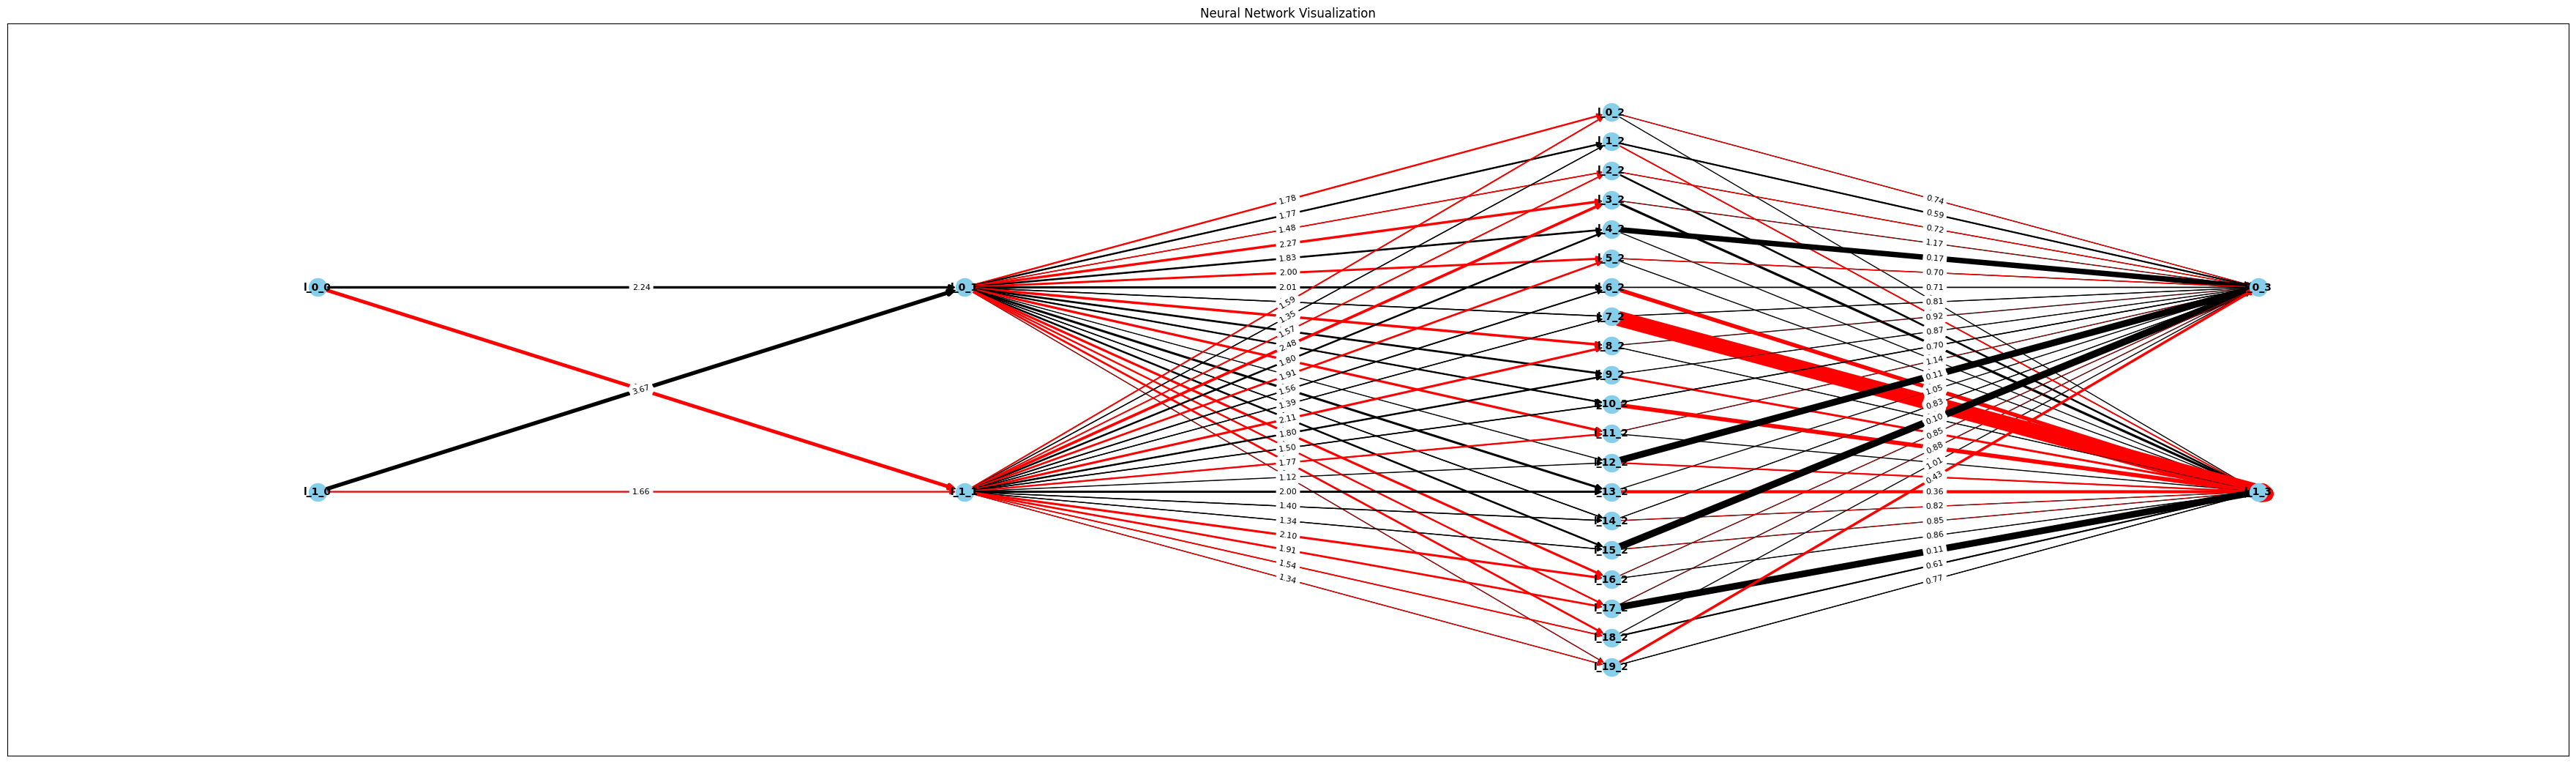

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import math

edge_colors = []
alpha = []
width = []
for u, v, d in G.edges(data=True):
    # print("Source is", u, "destination is", v, "and weight is", d["weight"])
    if d['weight'] > 0:
        edge_colors.append('black')
        value = (d['weight'] **(3/2))
    else:
        d['weight'] *= -1
        edge_colors.append('red')
        value = (d['weight'] **(3/2))
        print("stuff happened")
    alpha.append( d['weight'])

    cubed_value = d['weight'] ** 3
    if cubed_value > 0:
        log_of_cubed_value = math.log(cubed_value)  # natural logarithm (base e)
    else:
        cubed_value *= -1
        log_of_cubed_value = math.log(cubed_value)
    width.append(log_of_cubed_value)

plt.figure(figsize=(35, 10))

nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, arrows=True, width = width)


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Neural Network Visualization')

plt.axis('on')
plt.margins(0.1)

plt.show()

# Beautiful Sankey Diagram

In [ ]:
import plotly.graph_objects as go
import networkx as nx
import random

source = []
target = []
weights_list = []
edges = G.edges(data=True)

print("Length of edges:", len(edges))
for u, v, d in edges:
  if d["weight"] < 0:
    print("Negative weights")
  print("Source is", u, "destination is", v, "and weight is", d["weight"])
  cubed_value = d['weight'] ** 3
  if cubed_value > 0:
      cubed_value = math.log(cubed_value, 10)  # natural logarithm (base e)
  else:
      cubed_value *= -1
  source.append(u)
  target.append(v)
  weights_list.append(d["weight"].numpy())

node_to_index = {node: i for i, node in enumerate(sorted(G.nodes))}
print(len(source), len(target), len(weights))
source_index = []
target_index = []


for val in source:
  source_index.append(node_to_index[val])

for val in target:
  target_index.append(node_to_index[val])

print("Sources:", source_index)

print("Targets:", target_index)

print("Indexes:", node_to_index)
link_properties = {
    'source': source_index,
    'target': target_index,
    'value': weights_list,
    'color': "black"
}

node_properties = {
    'pad': 15,
    'thickness': 20,
    'line': dict(color="black", width=0.5),
    'label': sorted(G.nodes())
}

sankey_diagram = go.Sankey(node=node_properties, link=link_properties)

fig = go.Figure(data=[sankey_diagram])
fig.update_layout(title_text="Sankey Diagram for Neural Networks", font_size=10)
fig.show()


Length of edges: 84
Source is l_0_0 destination is l_0_1 and weight is tf.Tensor(2.2426496, shape=(), dtype=float32)
Source is l_0_0 destination is l_1_1 and weight is tf.Tensor(3.2275238, shape=(), dtype=float32)
Source is l_0_1 destination is l_0_2 and weight is tf.Tensor(1.7815984, shape=(), dtype=float32)
Source is l_0_1 destination is l_1_2 and weight is tf.Tensor(1.7668114, shape=(), dtype=float32)
Source is l_0_1 destination is l_2_2 and weight is tf.Tensor(1.4810251, shape=(), dtype=float32)
Source is l_0_1 destination is l_3_2 and weight is tf.Tensor(2.2711015, shape=(), dtype=float32)
Source is l_0_1 destination is l_4_2 and weight is tf.Tensor(1.8338854, shape=(), dtype=float32)
Source is l_0_1 destination is l_5_2 and weight is tf.Tensor(1.9989681, shape=(), dtype=float32)
Source is l_0_1 destination is l_6_2 and weight is tf.Tensor(2.0113728, shape=(), dtype=float32)
Source is l_0_1 destination is l_7_2 and weight is tf.Tensor(1.434891, shape=(), dtype=float32)
Source is l